# Exercise 2.5 Radar Recgonition

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [6]:
#download the weather images and put them in a directory
path =  r'C:\Users\wjzak\Dropbox\Career Foundry\Data Specialization\Module 2\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [7]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [8]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [11]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 50, 
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - accuracy: 0.6122 - loss: 0.1130 - val_accuracy: 0.7500 - val_loss: 0.0968
Epoch 2/50
 1/28 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.8750 - loss: 0.0790

d:\Virtual Env\my_project_env_pc\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8750 - loss: 0.0790 - val_accuracy: 0.7634 - val_loss: 0.0977
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.6987 - loss: 0.0916 - val_accuracy: 0.6830 - val_loss: 0.0901
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4000 - loss: 0.1405 - val_accuracy: 0.7009 - val_loss: 0.0873
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 302ms/step - accuracy: 0.7100 - loss: 0.0866 - val_accuracy: 0.7411 - val_loss: 0.0931
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7188 - loss: 0.0832 - val_accuracy: 0.7455 - val_loss: 0.0854
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.7917 - loss: 0.0752 - val_accuracy: 0.7321 - val_loss: 0.1050
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8750 - loss: 0.0653 - val_accuracy: 0.7411 - val_loss: 0.0993
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.8262 - loss: 0.0668 - val_accuracy: 0.7723 - val_loss

In [12]:
results = pd.DataFrame(model.history.history)

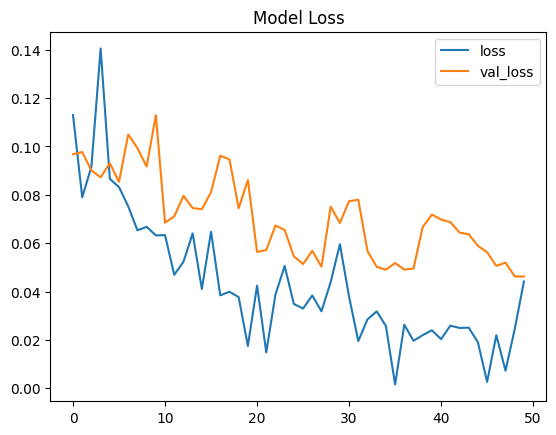

In [13]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

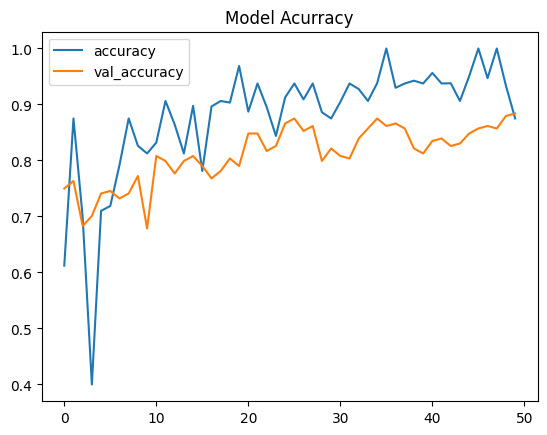

In [14]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [15]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.875, Val_Accuracy: 0.8839285969734192
Loss: 0.04416755586862564, Val_Loss: 0.046232614666223526


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


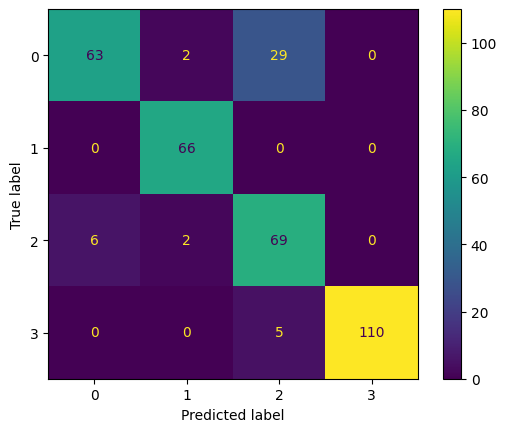

In [16]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [17]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


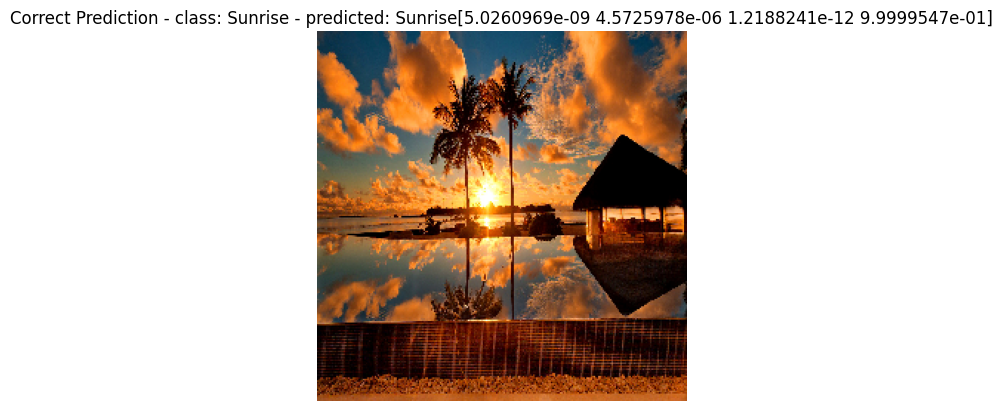

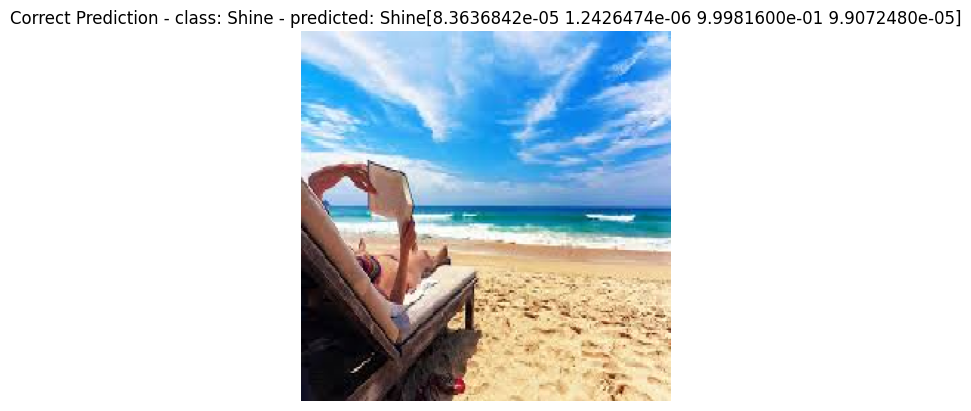

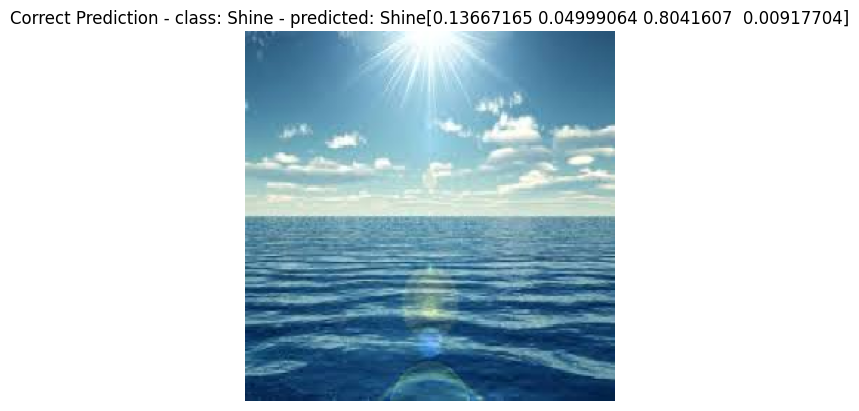

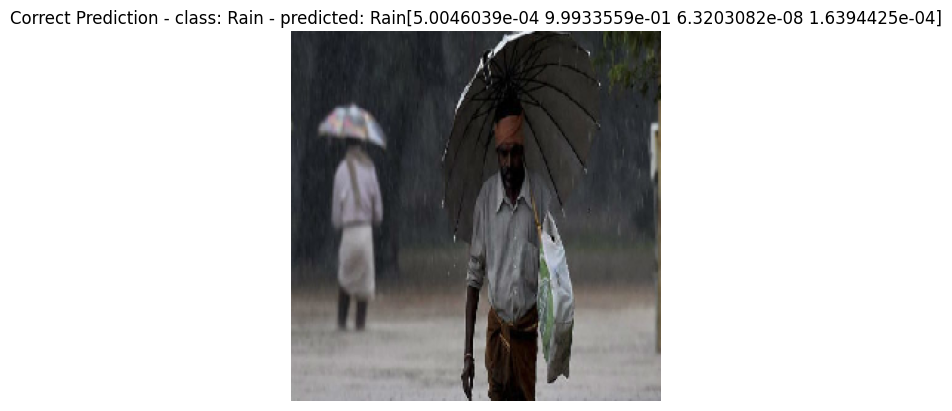

In [19]:
predict_one(model, 4) #<--you can show multiple pictures with this command. Just fill in the number you want to see.